<a href="https://colab.research.google.com/github/Likhita-Narra/Credit-Card-Fraud-Detection/blob/main/Algorithm_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Sourcing

In [1]:
import pandas as pd
import numpy as np 

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Credit Card Fraud Detection Dataset/PS_20174392719_1491204439457_log.csv")

Data Analysis

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
print(f"Size of the dataset: {len(data)}")

Size of the dataset: 6362620


In [8]:
print('Fraud Cases: {}'.format(len(data[data['isFraud'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['isFraud'] == 0])))

Fraud Cases: 8213
Valid Transactions: 6354407


Data pre-processing

In [11]:
data.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [12]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [17]:
# get all categorical columns in the dataframe
catCols = [col for col in data.columns if data[col].dtype=="O"]
print(catCols)

['type']


In [18]:
#cconverting categorical columns into integer range
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

for item in catCols:
    data[item] = lb_make.fit_transform(data[item])

In [19]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [20]:
# Cash_in = 0
# Cash_out = 1
# Debit = 2
# Payment = 3
# Transfer = 4

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

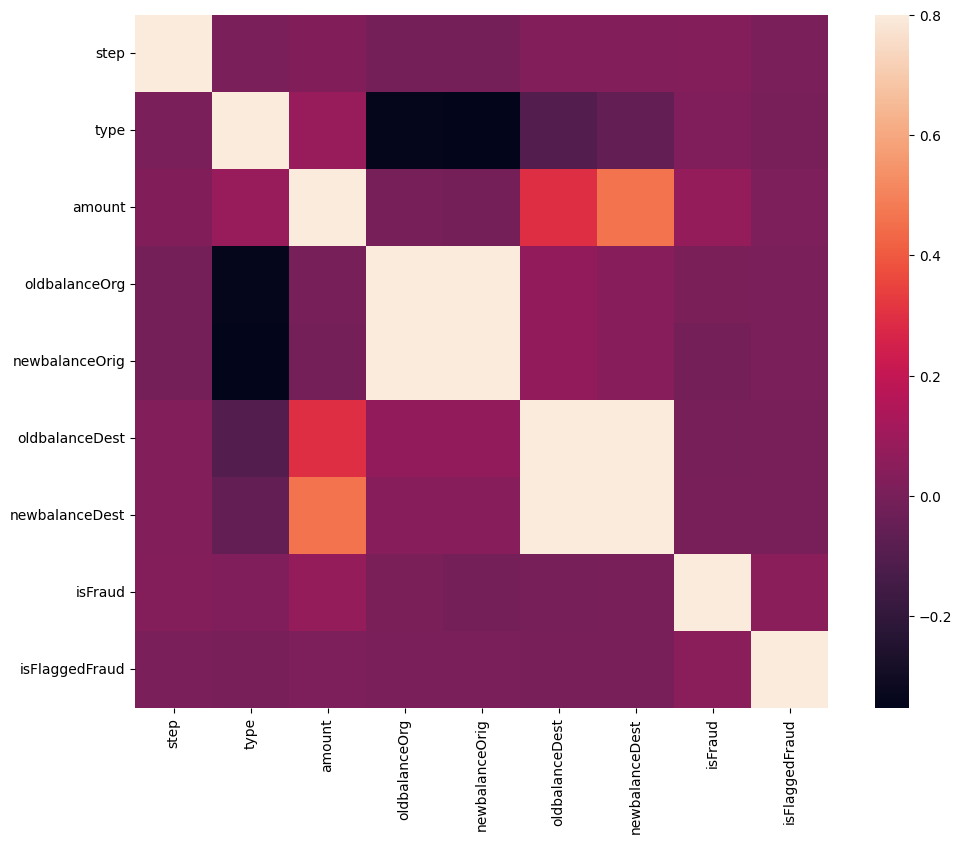

In [22]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

Using SMOTE to handle imbalanced dataset

In [26]:
print(f"Percentage of fraudulent transactions: {((len(data[data['isFraud'] == 1]))/(len(data)))*100}%")
print(f"Percentage of normal transactions: {((len(data[data['isFraud'] == 0]))/(len(data)))*100}%")

Percentage of fraudulent transactions: 0.12908204481801522%
Percentage of normal transactions: 99.87091795518198%


In [28]:
from imblearn.over_sampling import SMOTE
X = data.drop('isFraud', axis=1)
y = data['isFraud']

In [29]:
smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)

In [31]:
data = pd.concat([X_res, y_res], axis=1)

In [32]:
print(f"Percentage of fraudulent transactions: {((len(data[data['isFraud'] == 1]))/(len(data)))*100}%")
print(f"Percentage of normal transactions: {((len(data[data['isFraud'] == 0]))/(len(data)))*100}%")

Percentage of fraudulent transactions: 50.0%
Percentage of normal transactions: 50.0%
